In [48]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from collections import defaultdict

In [58]:
books_metadata = pd.read_json(r'Part-2/goodreads_books_poetry.json.gz', lines=True, orient='records')
interactions = pd.read_json(r'Part-2/goodreads_interactions_poetry.json.gz', lines=True,orient='records')

In [3]:
books_metadata.head()

isbn  text_reviews_count series country_code language_code  \
0                               1     []           US           eng   
1  0811223981                   2     []           US                 
2  0374428115                   7     []           US                 
3  0156182890                  12     []           US                 
4  1942004192                   4     []           US           eng   

                                     popular_shelves asin is_ebook  \
0  [{'count': '8', 'name': 'to-read'}, {'count': ...         false   
1  [{'count': '100', 'name': 'to-read'}, {'count'...         false   
2  [{'count': '32', 'name': 'to-read'}, {'count':...         false   
3  [{'count': '554', 'name': 'to-read'}, {'count'...         false   
4  [{'count': '228', 'name': 'to-read'}, {'count'...         false   

   average_rating kindle_asin  ... publication_month edition_information  \
0            3.83              ...                11                       
1            3.83  B00U2WY9U8  ...                 4                       
2            4.38              ...                 7                       
3            3.71  B00IWTRB1W  ...                 3                       
4            5.00              ...                12               First   

  publication_year                                                url  \
0             1887  https://www.goodreads.com/book/show/16037549-v...   
1             2015  https://www.goodreads.com/book/show/22466716-f...   
2             2008  https://www.goodreads.com/book/show/926662.Gro...   
3             1964  https://www.goodreads.com/book/show/926667.The...   
4             2015  https://www.goodreads.com/book/show/29065952-l...   

                                           image_url   book_id ratings_count  \
0  https://images.gr-assets.com/books/1348176637m...  16037549             3   
1  https://images.gr-assets.com/books/1404958407m...  22466716            37   
2  https://s.gr-assets.com/assets/nophoto/book/11...    926662            45   
3  https://images.gr-assets.com/books/1382939971m...    926667           115   
4  https://images.gr-assets.com/books/1455198396m...  29065952             9   

    work_id                                    title  \
0   5212748    Vision of Sir Launfal and Other Poems   
1  41905435                 Fairy Tales: Dramolettes   
2    911665  Growltiger's Last Stand and Other Poems   
3    995066                       The Cocktail Party   
4  49294781          Louder Than Everything You Love   

                      title_without_series  
0    Vision of Sir Launfal and Other Poems  
1                 Fairy Tales: Dramolettes  
2  Growltiger's Last Stand and Other Poems  
3                       The Cocktail Party  
4          Louder Than Everything You Love  

[5 rows x 29 columns]

In [4]:
interactions.head()

user_id   book_id  \
0  8842281e1d1347389f2ab93d60773d4d      1384   
1  8842281e1d1347389f2ab93d60773d4d      1376   
2  8842281e1d1347389f2ab93d60773d4d     30119   
3  72fb0d0087d28c832f15776b0d936598  24769928   
4  72fb0d0087d28c832f15776b0d936598     30119   

                          review_id  is_read  rating review_text_incomplete  \
0  1bad0122cebb4aa9213f9fe1aa281f66     True       4                          
1  eb6e502d0c04d57b43a5a02c21b64ab4     True       4                          
2  787564bef16cb1f43e0f641ab59d25b7     True       5                          
3  8c80ee74743d4b3b123dd1a2e0c0bcac    False       0                          
4  2a83589fb597309934ec9b1db5876aaf     True       3                          

                       date_added                    date_updated  \
0  Wed May 09 09:33:44 -0700 2007  Wed May 09 09:33:44 -0700 2007   
1  Wed May 09 09:33:18 -0700 2007  Wed May 09 09:33:18 -0700 2007   
2  Sat Jan 13 13:44:20 -0800 2007  Wed Mar 22 11:45:08 -0700 2017   
3  Wed Apr 27 11:05:51 -0700 2016  Wed Apr 27 11:05:52 -0700 2016   
4  Mon Jun 04 18:58:08 -0700 2012  Mon Jun 04 18:58:13 -0700 2012   

                          read_at started_at  
0                                             
1                                             
2  Tue Mar 01 00:00:00 -0800 1983             
3                                             
4

In [5]:
#Considering only selected fields for further analysis from books_metadata dataframe
books_metadata_selected = books_metadata[['book_id', 'average_rating', 'is_ebook', 'num_pages', 
'publication_year', 'ratings_count', 'language_code','title']]
books_metadata_selected.head()

book_id  average_rating is_ebook num_pages publication_year  \
0  16037549            3.83    false        80             1887   
1  22466716            3.83    false       128             2015   
2    926662            4.38    false                       2008   
3    926667            3.71    false       190             1964   
4  29065952            5.00    false       118             2015   

   ratings_count language_code                                    title  
0              3           eng    Vision of Sir Launfal and Other Poems  
1             37                               Fairy Tales: Dramolettes  
2             45                Growltiger's Last Stand and Other Poems  
3            115                                     The Cocktail Party  
4              9           eng          Louder Than Everything You Love

# EDA

Text(0.5, 1.0, 'Top 10 Books Based on Average Ratings')

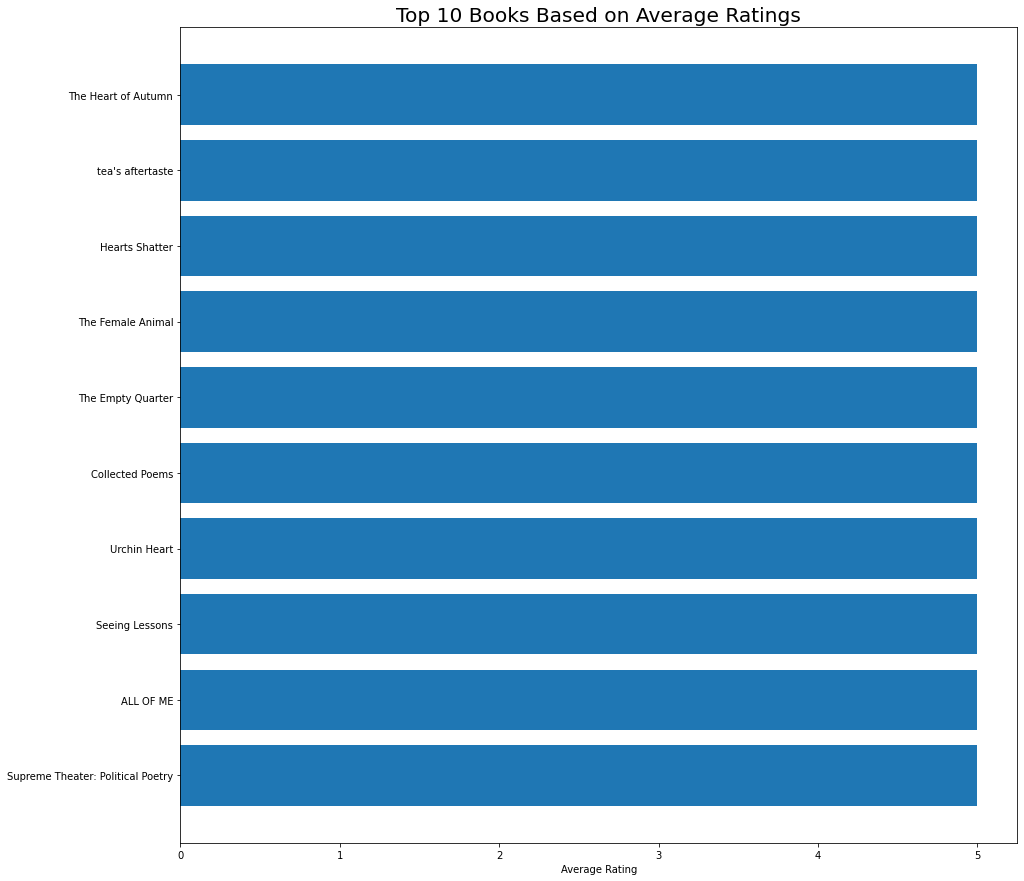

In [44]:
### create the df
avg_rating_df = books_metadata.sort_values(['average_rating'], ascending=False).head(10)

### set figure size and axes
fig, ax = plt.subplots(figsize = (15,15))

### declare our x and y components
y_books = np.arange(len(avg_rating_df))
rating = avg_rating_df.average_rating.max()

### plot them and give necessary texts 
plt.style.use(['fivethirtyeight'])
ax.barh(y_books, rating, align='center', tick_label = avg_rating_df.title)
ax.invert_yaxis()  
ax.set_xlabel('Average Rating')
ax.set_title('Top 10 Books Based on Average Ratings')

C:\Users\pramo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 Books Based on User Ratings')

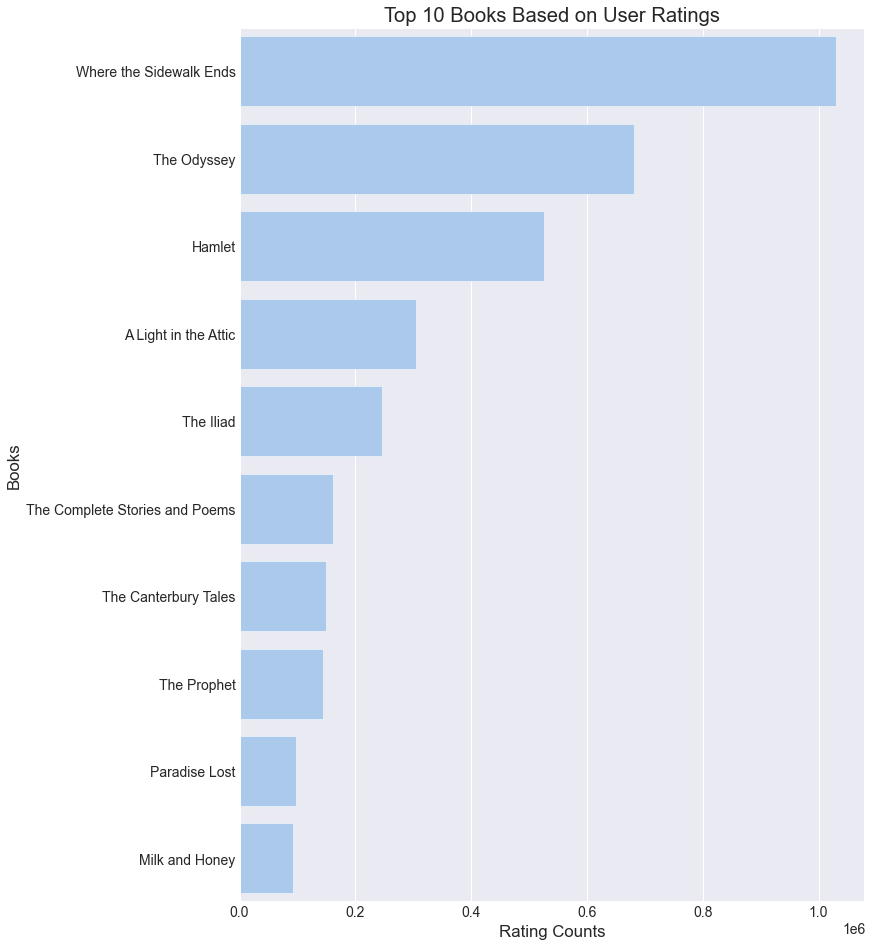

In [45]:
### get df
most_rated = books_metadata.sort_values('ratings_count', ascending = False).head(10).set_index('title')

### set style
sns.set_style("darkgrid")

### initialize the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 15))

### plot
sns.set_color_codes("pastel")
sns.barplot(most_rated['ratings_count'], most_rated.index, label="Total", color="b")
ax.set(ylabel="Books",xlabel="Rating Counts")
ax.set_title('Top 10 Books Based on User Ratings')

In [6]:
positive_interaction = []
negative_interaction = []

for i, row in tqdm(interactions.iterrows()):
    if row['is_read'] == True:
        positive_interaction.append({"user_id":row["user_id"],"book_id":row["book_id"],"rating":row["rating"]})
    else:
        negative_interaction.append({"user_id":row["user_id"],"book_id":row["book_id"],"rating":row["rating"]})

2734350it [01:42, 26697.16it/s]


In [7]:
print(len(positive_interaction))
print(len(negative_interaction))

1313610
1420740


In [8]:
positive_interaction

[{'user_id': '8842281e1d1347389f2ab93d60773d4d', 'book_id': 1384, 'rating': 4},
 {'user_id': '8842281e1d1347389f2ab93d60773d4d', 'book_id': 1376, 'rating': 4},
 {'user_id': '8842281e1d1347389f2ab93d60773d4d',
  'book_id': 30119,
  'rating': 5},
 {'user_id': '72fb0d0087d28c832f15776b0d936598',
  'book_id': 30119,
  'rating': 3},
 {'user_id': 'ab2923b738ea3082f5f3efcbbfacb218',
  'book_id': 240007,
  'rating': 4},
 {'user_id': 'ab2923b738ea3082f5f3efcbbfacb218',
  'book_id': 30119,
  'rating': 4},
 {'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 2696, 'rating': 3},
 {'user_id': '06316bec7a49286f1f98d5acce24f923',
  'book_id': 30118,
  'rating': 4},
 {'user_id': '06316bec7a49286f1f98d5acce24f923',
  'book_id': 30119,
  'rating': 5},
 {'user_id': '06316bec7a49286f1f98d5acce24f923',
  'book_id': 23919,
  'rating': 5},
 {'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 1420, 'rating': 5},
 {'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 6295, 'rating': 4},
 {'u

In [9]:
def Jaccard(s1, s2):
    numer = len(s1.intersection(s2))
    denom = len(s1.union(s2))
    if denom == 0:
        return 0
    return numer / denom

In [10]:
usersPerItem = defaultdict(set) 
itemsPerUser = defaultdict(set)
ratingDict = {}

In [11]:
for i, row in tqdm(interactions.iterrows()):
    user,item = row["user_id"], row["book_id"]
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)
    ratingDict[(user,item)] = row["rating"]

2734350it [01:44, 26163.08it/s]


In [12]:
userAverages = {}
itemAverages = {}

for u in itemsPerUser:
    rs = [ratingDict[(u,i)] for i in itemsPerUser[u]]
    userAverages[u] = sum(rs) / len(rs)
    
for i in usersPerItem:
    rs = [ratingDict[(u,i)] for u in usersPerItem[i]]
    itemAverages[i] = sum(rs) / len(rs)

In [13]:
def mostSimilar(i, N):
    similarities = []
    users = usersPerItem[i]
    for i2 in usersPerItem:
        if i2 == i: continue
        sim = Jaccard(users, usersPerItem[i2])
        #sim = Pearson(i, i2) # Could use alternate similarity metrics straightforwardly
        similarities.append((sim,i2))
#     print(similarities)
#     similarities.sort(reverse=True)
    return similarities[:10]

In [14]:
def mostSimilar_v2(i, N):
    similarities = []
    items = itemsPerUser[i]
    for i2 in itemsPerUser:
        if i2 == i: continue
        sim = Jaccard(items, itemsPerUser[i2])
        #sim = Pearson(i, i2) # Could use alternate similarity metrics straightforwardly
        similarities.append((sim,i2))
#     print(similarities)
#     similarities.sort(reverse=True)
    return similarities[:10]

In [15]:
len(positive_interaction)

1313610

In [17]:
import time
updated_postive_interaction_list = []
for val in tqdm(positive_interaction[:100]):
#     print(val['book_id'])
#     print(val['user_id'])
    start = time.time()
    output = mostSimilar(val['book_id'], 1)
    
#     print("output ===",output)
    output_1 = mostSimilar_v2(val['user_id'], 1)
    end = time.time()
    print(end-start)
#     print(output[0][0],output[0][1])
#     print(output_1[0][0],output_1[0][1])
    val['similar_book_id'] = output[0][1]
    val['similar_book_id_score'] = output[0][0]
    val['similar_user_id_score'] = output_1[0][0]
    val['similar_user_id'] = output_1[0][1]
    print(val)
#     break
    updated_postive_interaction_list.append(val)
    

  1%|▊                                                                                 | 1/100 [00:01<01:57,  1.19s/it]

1.1897251605987549
{'user_id': '8842281e1d1347389f2ab93d60773d4d', 'book_id': 1384, 'rating': 4, 'similar_book_id': 1376, 'similar_book_id_score': 0.10244988864142539, 'similar_user_id_score': 0.25, 'similar_user_id': '72fb0d0087d28c832f15776b0d936598'}


  2%|█▋                                                                                | 2/100 [00:02<01:46,  1.09s/it]

1.013789415359497
{'user_id': '8842281e1d1347389f2ab93d60773d4d', 'book_id': 1376, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.10244988864142539, 'similar_user_id_score': 0.25, 'similar_user_id': '72fb0d0087d28c832f15776b0d936598'}


  3%|██▎                                                                            | 3/100 [05:39<4:09:49, 154.53s/it]

337.1327557563782
{'user_id': '8842281e1d1347389f2ab93d60773d4d', 'book_id': 30119, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.25, 'similar_user_id': '72fb0d0087d28c832f15776b0d936598'}


  4%|███▏                                                                           | 4/100 [11:30<6:11:26, 232.15s/it]

351.12661576271057
{'user_id': '72fb0d0087d28c832f15776b0d936598', 'book_id': 30119, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.25, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


  5%|███▉                                                                           | 5/100 [11:31<3:55:45, 148.90s/it]

1.293503761291504
{'user_id': 'ab2923b738ea3082f5f3efcbbfacb218', 'book_id': 240007, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.001488095238095238, 'similar_user_id_score': 0.25, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


  6%|████▋                                                                          | 6/100 [17:22<5:40:45, 217.50s/it]

350.6616780757904
{'user_id': 'ab2923b738ea3082f5f3efcbbfacb218', 'book_id': 30119, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.25, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


  7%|█████▌                                                                         | 7/100 [19:28<4:50:40, 187.53s/it]

125.81988477706909
{'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 2696, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0037433555439095605, 'similar_user_id_score': 0.125, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


  8%|██████▎                                                                        | 8/100 [21:19<4:10:23, 163.30s/it]

111.42242479324341
{'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 30118, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.002053884257581249, 'similar_user_id_score': 0.125, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


  9%|███████                                                                        | 9/100 [26:56<5:29:56, 217.55s/it]

336.8195598125458
{'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 30119, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.125, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 10%|███████▊                                                                      | 10/100 [28:40<4:33:38, 182.43s/it]

103.79615759849548
{'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 23919, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0016004389775481275, 'similar_user_id_score': 0.125, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 11%|████████▌                                                                     | 11/100 [34:00<5:33:21, 224.74s/it]

320.6765966415405
{'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 1420, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017756255044390637, 'similar_user_id_score': 0.125, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 12%|█████████▎                                                                    | 12/100 [34:16<3:56:10, 161.03s/it]

15.295764684677124
{'user_id': '06316bec7a49286f1f98d5acce24f923', 'book_id': 6295, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0019027134348113832, 'similar_user_id_score': 0.125, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 13%|██████████▏                                                                   | 13/100 [35:57<3:27:22, 143.02s/it]

101.59105849266052
{'user_id': '1711b2a40d154603f157536619f71967', 'book_id': 2547, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017255471800926346, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 14%|██████████▉                                                                   | 14/100 [35:58<2:23:27, 100.09s/it]

0.8868229389190674
{'user_id': '220ef9c058a2132e6a9827f93a821d87', 'book_id': 18743, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.00338409475465313, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 15%|███████████▊                                                                   | 15/100 [35:59<1:39:27, 70.20s/it]

0.9343621730804443
{'user_id': '220ef9c058a2132e6a9827f93a821d87', 'book_id': 52820, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.004048582995951417, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 16%|████████████▋                                                                  | 16/100 [36:00<1:09:03, 49.33s/it]

0.8564467430114746
{'user_id': '220ef9c058a2132e6a9827f93a821d87', 'book_id': 543235, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0018248175182481751, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 17%|█████████████▍                                                                 | 17/100 [37:41<1:29:37, 64.79s/it]

100.7314121723175
{'user_id': '220ef9c058a2132e6a9827f93a821d87', 'book_id': 23919, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0016004389775481275, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 18%|██████████████                                                                | 18/100 [47:04<4:53:02, 214.43s/it]

562.7718076705933
{'user_id': '220ef9c058a2132e6a9827f93a821d87', 'book_id': 1381, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 19%|██████████████▊                                                               | 19/100 [48:54<4:07:17, 183.18s/it]

110.39160871505737
{'user_id': '220ef9c058a2132e6a9827f93a821d87', 'book_id': 15997, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0037964424348419573, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 20%|███████████████▌                                                              | 20/100 [54:46<5:11:59, 233.99s/it]

352.395494222641
{'user_id': '4b3636a043e5c99fa27ac897ccfa1151', 'book_id': 30119, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.3333333333333333, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 21%|████████████████▍                                                             | 21/100 [57:44<4:45:55, 217.16s/it]

177.93380069732666
{'user_id': '4035e5f05352217609c1a294410f2d50', 'book_id': 1371, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0027008777852802163, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 22%|████████████████▋                                                           | 22/100 [1:04:20<5:51:48, 270.62s/it]

395.27466225624084
{'user_id': '4035e5f05352217609c1a294410f2d50', 'book_id': 1381, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 23%|█████████████████▍                                                          | 23/100 [1:04:24<4:04:48, 190.76s/it]

4.506100654602051
{'user_id': 'afc070543f19028dc7e7f084a0079f72', 'book_id': 35606560, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.001300672013873835, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 24%|██████████████████▏                                                         | 24/100 [1:06:44<3:42:13, 175.44s/it]

139.70844626426697
{'user_id': 'dc3763cdb9b2cae805882878eebb6a32', 'book_id': 2696, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0037433555439095605, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 25%|███████████████████                                                         | 25/100 [1:09:06<3:26:43, 165.39s/it]

141.92240619659424
{'user_id': '96a4eae3201cf9eb0fd36a900611c925', 'book_id': 23513349, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.001502813406493552, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 26%|███████████████████▊                                                        | 26/100 [1:09:07<2:23:07, 116.05s/it]

0.9418504238128662
{'user_id': '7b2e5fe9fd353fecf3eeebb4850b88d3', 'book_id': 15812153, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.001349527665317139, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 27%|████████████████████▊                                                        | 27/100 [1:09:13<1:41:14, 83.21s/it]

6.601577997207642
{'user_id': 'bafc2d50014200cda7cb2b6acd60cd73', 'book_id': 95819, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.002107994162477704, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 28%|█████████████████████▌                                                       | 28/100 [1:09:19<1:12:06, 60.09s/it]

6.127792119979858
{'user_id': 'bafc2d50014200cda7cb2b6acd60cd73', 'book_id': 53022, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.004073680481756996, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 29%|██████████████████████▉                                                        | 29/100 [1:09:31<54:03, 45.68s/it]

12.067006826400757
{'user_id': 'bafc2d50014200cda7cb2b6acd60cd73', 'book_id': 42038, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.003005181347150259, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 30%|███████████████████████▋                                                       | 30/100 [1:09:59<47:05, 40.37s/it]

27.9658100605011
{'user_id': 'bafc2d50014200cda7cb2b6acd60cd73', 'book_id': 27494, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0030700530281886685, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 31%|████████████████████████▍                                                      | 31/100 [1:10:03<33:42, 29.31s/it]

3.5090699195861816
{'user_id': '3ca7375dba942a760e53b726c472a7dd', 'book_id': 402128, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.004427083333333333, 'similar_user_id_score': 0.25, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 32%|████████████████████████▎                                                   | 32/100 [1:15:59<2:24:24, 127.41s/it]

356.3143801689148
{'user_id': '3ca7375dba942a760e53b726c472a7dd', 'book_id': 30119, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.25, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 33%|█████████████████████████▍                                                   | 33/100 [1:16:04<1:41:12, 90.64s/it]

4.8230671882629395
{'user_id': '0ef32090550901ead25cb0ea21c4d36b', 'book_id': 23534, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0028779739063699156, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 34%|██████████████████████████▏                                                  | 34/100 [1:16:05<1:10:06, 63.74s/it]

0.9711542129516602
{'user_id': '0ef32090550901ead25cb0ea21c4d36b', 'book_id': 92270, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013458950201884253, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 35%|███████████████████████████▋                                                   | 35/100 [1:16:06<48:38, 44.90s/it]

0.9183013439178467
{'user_id': '0ef32090550901ead25cb0ea21c4d36b', 'book_id': 908708, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 36%|████████████████████████████▍                                                  | 36/100 [1:16:15<36:30, 34.22s/it]

9.307713985443115
{'user_id': '93c5e16254e7838b69178338bb20459e', 'book_id': 19351, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0032968326857411986, 'similar_user_id_score': 0.16666666666666666, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 37%|████████████████████████████▍                                                | 37/100 [1:18:09<1:00:55, 58.03s/it]

113.58831572532654
{'user_id': '93c5e16254e7838b69178338bb20459e', 'book_id': 23919, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0016004389775481275, 'similar_user_id_score': 0.16666666666666666, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 38%|████████████████████████████▉                                               | 38/100 [1:24:06<2:32:37, 147.70s/it]

356.9227168560028
{'user_id': '93c5e16254e7838b69178338bb20459e', 'book_id': 30119, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.16666666666666666, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 39%|█████████████████████████████▋                                              | 39/100 [1:29:23<3:21:50, 198.54s/it]

317.1527805328369
{'user_id': 'a3a4e571b82e9395db73f25ae79742e8', 'book_id': 1420, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017756255044390637, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 40%|██████████████████████████████▍                                             | 40/100 [1:32:16<3:10:49, 190.82s/it]

172.8192958831787
{'user_id': 'a3a4e571b82e9395db73f25ae79742e8', 'book_id': 1371, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0027008777852802163, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 41%|███████████████████████████████▏                                            | 41/100 [1:32:19<2:12:16, 134.51s/it]

3.1136672496795654
{'user_id': 'd37b46b2190ed7c518259f29b47a9b36', 'book_id': 253264, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0022818026240730175, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 42%|████████████████████████████████▎                                            | 42/100 [1:32:20<1:31:23, 94.55s/it]

1.3038620948791504
{'user_id': 'af157d0205b8a901dee6d4a2aed7e6ad', 'book_id': 70885, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0023023791250959325, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 43%|█████████████████████████████████                                            | 43/100 [1:32:21<1:03:06, 66.43s/it]

0.8367955684661865
{'user_id': 'af157d0205b8a901dee6d4a2aed7e6ad', 'book_id': 15829076, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 44%|██████████████████████████████████▊                                            | 44/100 [1:32:26<44:42, 47.89s/it]

4.634631633758545
{'user_id': 'af157d0205b8a901dee6d4a2aed7e6ad', 'book_id': 23534, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0028779739063699156, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 45%|█████████████████████████████████▎                                        | 45/100 [2:40:31<19:14:14, 1259.18s/it]

4085.4957325458527
{'user_id': '012aa353140af13109d00ca36cdc0637', 'book_id': 23919, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0016004389775481275, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 46%|██████████████████████████████████▌                                        | 46/100 [2:46:12<14:45:14, 983.59s/it]

340.5677762031555
{'user_id': '012aa353140af13109d00ca36cdc0637', 'book_id': 30119, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 47%|███████████████████████████████████▎                                       | 47/100 [2:46:14<10:08:51, 689.27s/it]

2.5261032581329346
{'user_id': '012aa353140af13109d00ca36cdc0637', 'book_id': 676, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.004179331306990881, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 48%|████████████████████████████████████▍                                       | 48/100 [2:46:19<6:59:22, 483.89s/it]

4.6618006229400635
{'user_id': '06bd41ab4c378a8c5a9d45c6b4779650', 'book_id': 1432, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.005668934240362812, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 49%|█████████████████████████████████████▏                                      | 49/100 [2:46:20<4:48:08, 338.99s/it]

0.8729593753814697
{'user_id': '854d7eea57ee70acf835e2ba5262e3d9', 'book_id': 24611931, 'rating': 0, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017211703958691911, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 50%|██████████████████████████████████████                                      | 50/100 [2:52:08<4:44:46, 341.74s/it]

348.15626764297485
{'user_id': '8489357f2f485c1a961d4cbdc54ea84b', 'book_id': 30119, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.09090909090909091, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 51%|██████████████████████████████████████▊                                     | 51/100 [2:52:24<3:19:17, 244.03s/it]

16.035768747329712
{'user_id': '8489357f2f485c1a961d4cbdc54ea84b', 'book_id': 12914, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.004061944656004062, 'similar_user_id_score': 0.09090909090909091, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 52%|███████████████████████████████████████▌                                    | 52/100 [2:58:12<3:40:14, 275.31s/it]

348.2995653152466
{'user_id': '8489357f2f485c1a961d4cbdc54ea84b', 'book_id': 1381, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.09090909090909091, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 53%|████████████████████████████████████████▎                                   | 53/100 [2:58:17<2:32:00, 194.04s/it]

4.419982194900513
{'user_id': '8489357f2f485c1a961d4cbdc54ea84b', 'book_id': 1519, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.00631670659986931, 'similar_user_id_score': 0.09090909090909091, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 54%|█████████████████████████████████████████                                   | 54/100 [2:58:23<1:45:35, 137.72s/it]

6.297154188156128
{'user_id': '8489357f2f485c1a961d4cbdc54ea84b', 'book_id': 32552, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0016204829039053639, 'similar_user_id_score': 0.09090909090909091, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 55%|█████████████████████████████████████████▊                                  | 55/100 [3:00:04<1:34:59, 126.67s/it]

100.87361216545105
{'user_id': 'c00645f3ed225ef9527ea0d8e4b55fc9', 'book_id': 23919, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0016004389775481275, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 56%|██████████████████████████████████████████▌                                 | 56/100 [3:05:33<2:17:31, 187.53s/it]

329.53592467308044
{'user_id': 'c00645f3ed225ef9527ea0d8e4b55fc9', 'book_id': 1420, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017756255044390637, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 57%|███████████████████████████████████████████▎                                | 57/100 [3:05:50<1:37:38, 136.25s/it]

16.597739934921265
{'user_id': 'c00645f3ed225ef9527ea0d8e4b55fc9', 'book_id': 6295, 'rating': 2, 'similar_book_id': 1384, 'similar_book_id_score': 0.0019027134348113832, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 58%|████████████████████████████████████████████▋                                | 58/100 [3:05:51<1:06:56, 95.63s/it]

0.8454837799072266
{'user_id': '8ecbc8ba108ccf1be156d99a7415c44d', 'book_id': 1503869, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017331022530329288, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 59%|██████████████████████████████████████████████▌                                | 59/100 [3:05:52<46:03, 67.41s/it]

1.559563398361206
{'user_id': '8ecbc8ba108ccf1be156d99a7415c44d', 'book_id': 195769, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0024009603841536613, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 60%|█████████████████████████████████████████████▌                              | 60/100 [3:11:40<1:40:52, 151.32s/it]

347.1208486557007
{'user_id': '4e98500e643d1339885d656a980a4a52', 'book_id': 30119, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.25, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 61%|██████████████████████████████████████████████▎                             | 61/100 [3:17:00<2:11:22, 202.10s/it]

320.59532928466797
{'user_id': '4e98500e643d1339885d656a980a4a52', 'book_id': 1420, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017756255044390637, 'similar_user_id_score': 0.25, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 62%|███████████████████████████████████████████████                             | 62/100 [3:19:57<2:03:15, 194.62s/it]

177.15445518493652
{'user_id': '5d99e945d98169c37484b38244ac444b', 'book_id': 1371, 'rating': 2, 'similar_book_id': 1384, 'similar_book_id_score': 0.0027008777852802163, 'similar_user_id_score': 0.14285714285714285, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 63%|███████████████████████████████████████████████▉                            | 63/100 [3:25:38<2:26:58, 238.33s/it]

340.306200504303
{'user_id': '5d99e945d98169c37484b38244ac444b', 'book_id': 30119, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.14285714285714285, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 64%|████████████████████████████████████████████████▋                           | 64/100 [3:31:22<2:42:01, 270.04s/it]

344.05225801467896
{'user_id': '5d99e945d98169c37484b38244ac444b', 'book_id': 1381, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.14285714285714285, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 65%|█████████████████████████████████████████████████▍                          | 65/100 [3:31:28<1:51:22, 190.94s/it]

6.367479562759399
{'user_id': '5d99e945d98169c37484b38244ac444b', 'book_id': 732562, 'rating': 2, 'similar_book_id': 1384, 'similar_book_id_score': 0.004061230865354577, 'similar_user_id_score': 0.14285714285714285, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 66%|██████████████████████████████████████████████████▏                         | 66/100 [3:33:27<1:36:00, 169.43s/it]

119.21485567092896
{'user_id': 'e180ead13b5022e2c579c27aff0f7ada', 'book_id': 2696, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0037433555439095605, 'similar_user_id_score': 0.06666666666666667, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 67%|██████████████████████████████████████████████████▉                         | 67/100 [3:35:21<1:24:01, 152.76s/it]

113.86731100082397
{'user_id': 'e180ead13b5022e2c579c27aff0f7ada', 'book_id': 30118, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.002053884257581249, 'similar_user_id_score': 0.06666666666666667, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 68%|███████████████████████████████████████████████████▋                        | 68/100 [3:41:36<1:57:05, 219.53s/it]

375.3382487297058
{'user_id': 'e180ead13b5022e2c579c27aff0f7ada', 'book_id': 30119, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.06666666666666667, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 69%|████████████████████████████████████████████████████▍                       | 69/100 [3:48:26<2:22:56, 276.66s/it]

409.9573109149933
{'user_id': 'e180ead13b5022e2c579c27aff0f7ada', 'book_id': 1381, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.06666666666666667, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 70%|█████████████████████████████████████████████████████▏                      | 70/100 [3:48:27<1:36:59, 193.98s/it]

1.0352473258972168
{'user_id': 'e180ead13b5022e2c579c27aff0f7ada', 'book_id': 44178, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.06666666666666667, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 71%|█████████████████████████████████████████████████████▉                      | 71/100 [3:48:29<1:05:48, 136.14s/it]

1.1939196586608887
{'user_id': 'e180ead13b5022e2c579c27aff0f7ada', 'book_id': 119841, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0031545741324921135, 'similar_user_id_score': 0.06666666666666667, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 72%|██████████████████████████████████████████████████████▋                     | 72/100 [3:50:45<1:03:32, 136.18s/it]

136.25232553482056
{'user_id': 'd20102b939fd040355d6c2452230f709', 'book_id': 30118, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.002053884257581249, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 73%|███████████████████████████████████████████████████████▍                    | 73/100 [3:57:26<1:37:01, 215.61s/it]

400.9511950016022
{'user_id': 'd20102b939fd040355d6c2452230f709', 'book_id': 30119, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 74%|████████████████████████████████████████████████████████▏                   | 74/100 [4:03:06<1:49:33, 252.83s/it]

339.66856694221497
{'user_id': 'd20102b939fd040355d6c2452230f709', 'book_id': 1420, 'rating': 2, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017756255044390637, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 75%|█████████████████████████████████████████████████████████                   | 75/100 [4:03:06<1:13:50, 177.24s/it]

0.8572254180908203
{'user_id': '623103c8b74b4e97b2077ff2fd33514b', 'book_id': 12955405, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 76%|███████████████████████████████████████████████████████████▎                  | 76/100 [4:03:07<49:43, 124.32s/it]

0.8592100143432617
{'user_id': '623103c8b74b4e97b2077ff2fd33514b', 'book_id': 17157815, 'rating': 2, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 77%|████████████████████████████████████████████████████████████▊                  | 77/100 [4:03:18<34:35, 90.26s/it]

10.763708114624023
{'user_id': '623103c8b74b4e97b2077ff2fd33514b', 'book_id': 14706, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0036600244001626678, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 78%|█████████████████████████████████████████████████████████████▌                 | 78/100 [4:03:19<23:15, 63.45s/it]

0.8994781970977783
{'user_id': '623103c8b74b4e97b2077ff2fd33514b', 'book_id': 13425881, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 79%|██████████████████████████████████████████████████████████████▍                | 79/100 [4:03:20<15:38, 44.68s/it]

0.8771834373474121
{'user_id': '623103c8b74b4e97b2077ff2fd33514b', 'book_id': 12955393, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 80%|███████████████████████████████████████████████████████████████▏               | 80/100 [4:03:22<10:38, 31.93s/it]

2.1765716075897217
{'user_id': '623103c8b74b4e97b2077ff2fd33514b', 'book_id': 66414, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.003683241252302026, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 81%|███████████████████████████████████████████████████████████████▉               | 81/100 [4:03:23<07:09, 22.61s/it]

0.8591938018798828
{'user_id': '623103c8b74b4e97b2077ff2fd33514b', 'book_id': 12375480, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 82%|████████████████████████████████████████████████████████████████▊              | 82/100 [4:03:28<05:10, 17.22s/it]

4.658158540725708
{'user_id': 'f4c6fe33ef61c38f7f4aeb5224c259a5', 'book_id': 13105527, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0009487666034155598, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 83%|█████████████████████████████████████████████████████████████████▌             | 83/100 [4:06:21<18:11, 64.22s/it]

173.87964606285095
{'user_id': '08920c9c72f03d03df72908ce393f7e7', 'book_id': 1371, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0027008777852802163, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 84%|██████████████████████████████████████████████████████████████████▎            | 84/100 [4:08:03<20:04, 75.31s/it]

101.18334484100342
{'user_id': '5b70e03ded9e16cb02b4bab42587b4c0', 'book_id': 2547, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017255471800926346, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 85%|███████████████████████████████████████████████████████████████████▏           | 85/100 [4:08:04<13:19, 53.29s/it]

1.9229767322540283
{'user_id': '26b5bed05bcabbabdaec4ee08fc43244', 'book_id': 764332, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.008579088471849867, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 86%|███████████████████████████████████████████████████████████████████▉           | 86/100 [4:08:09<09:00, 38.60s/it]

4.321595907211304
{'user_id': '26b5bed05bcabbabdaec4ee08fc43244', 'book_id': 1519, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.00631670659986931, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 87%|████████████████████████████████████████████████████████████████████▋          | 87/100 [4:08:21<06:38, 30.68s/it]

12.177490472793579
{'user_id': '26b5bed05bcabbabdaec4ee08fc43244', 'book_id': 1715, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.006005089058524173, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 88%|█████████████████████████████████████████████████████████████████████▌         | 88/100 [4:08:36<05:12, 26.00s/it]

15.096392393112183
{'user_id': '26b5bed05bcabbabdaec4ee08fc43244', 'book_id': 12914, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.004061944656004062, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 89%|██████████████████████████████████████████████████████████████████████▎        | 89/100 [4:11:32<13:02, 71.11s/it]

176.35638332366943
{'user_id': '26b5bed05bcabbabdaec4ee08fc43244', 'book_id': 1371, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0027008777852802163, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 90%|██████████████████████████████████████████████████████████████████████▏       | 90/100 [4:17:18<25:35, 153.56s/it]

345.9388630390167
{'user_id': '26b5bed05bcabbabdaec4ee08fc43244', 'book_id': 1381, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 91%|██████████████████████████████████████████████████████████████████████▉       | 91/100 [4:19:20<21:34, 143.89s/it]

121.32010841369629
{'user_id': '26b5bed05bcabbabdaec4ee08fc43244', 'book_id': 2696, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0037433555439095605, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 92%|███████████████████████████████████████████████████████████████████████▊      | 92/100 [4:24:42<26:19, 197.43s/it]

322.3464961051941
{'user_id': '4672eb229c808b792b8ea95f01f19784', 'book_id': 1420, 'rating': 1, 'similar_book_id': 1384, 'similar_book_id_score': 0.0017756255044390637, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 93%|████████████████████████████████████████████████████████████████████████▌     | 93/100 [4:30:28<28:13, 241.98s/it]

345.936975479126
{'user_id': '4672eb229c808b792b8ea95f01f19784', 'book_id': 1381, 'rating': 3, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 94%|█████████████████████████████████████████████████████████████████████████▎    | 94/100 [4:30:31<17:00, 170.14s/it]

2.5059540271759033
{'user_id': 'e5a7b620c83ea9268e89013dba154c70', 'book_id': 14553840, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0011511895625479663, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 95%|██████████████████████████████████████████████████████████████████████████    | 95/100 [4:33:25<14:17, 171.46s/it]

174.55235719680786
{'user_id': '478f3accbbb16d817fd90732215b6391', 'book_id': 1371, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0027008777852802163, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 96%|██████████████████████████████████████████████████████████████████████████▉   | 96/100 [4:39:06<14:49, 222.44s/it]

341.3715043067932
{'user_id': '478f3accbbb16d817fd90732215b6391', 'book_id': 1381, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 97%|███████████████████████████████████████████████████████████████████████████▋  | 97/100 [4:40:57<09:27, 189.00s/it]

110.98680090904236
{'user_id': 'fd379cf294fc1937e41f3f7df3c9eabe', 'book_id': 30118, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.002053884257581249, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 98%|████████████████████████████████████████████████████████████████████████████▍ | 98/100 [4:46:32<07:45, 232.82s/it]

335.0526728630066
{'user_id': 'fd379cf294fc1937e41f3f7df3c9eabe', 'book_id': 30119, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0013602387681255117, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


 99%|█████████████████████████████████████████████████████████████████████████████▏| 99/100 [4:52:14<04:25, 265.31s/it]

341.11475443840027
{'user_id': 'fd379cf294fc1937e41f3f7df3c9eabe', 'book_id': 1381, 'rating': 4, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.2, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [4:57:55<00:00, 178.75s/it]

341.32688546180725
{'user_id': 'd3492185291fee0103a736299debaed9', 'book_id': 1381, 'rating': 5, 'similar_book_id': 1384, 'similar_book_id_score': 0.0005222886689473272, 'similar_user_id_score': 0.0, 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}


In [20]:
file_name = "updated_postive_interaction_list.pkl"

open_file = open(file_name, "wb")
pickle.dump(updated_postive_interaction_list, open_file)
open_file.close()

In [21]:
updated_postive_interaction_list[0]

{'user_id': '8842281e1d1347389f2ab93d60773d4d',
 'book_id': 1384,
 'rating': 4,
 'similar_book_id': 1376,
 'similar_book_id_score': 0.10244988864142539,
 'similar_user_id_score': 0.25,
 'similar_user_id': '72fb0d0087d28c832f15776b0d936598'}

In [22]:
updated_negative_interaction_list = []
for val in tqdm(negative_interaction[:100]):
#     print(val['book_id'])
#     print(val['user_id'])
    output = mostSimilar(val['book_id'], 1)
#     print("output ===",output)
    output_1 = mostSimilar_v2(val['user_id'], 1)
#     print(output[0][0],output[0][1])
#     print(output_1[0][0],output_1[0][1])
    val['similar_book_id'] = output[0][1]
    val['similar_book_id_score'] = output[0][0]
    val['similar_user_id_score'] = output_1[0][0]
    val['similar_user_id'] = output_1[0][1]
#     print(val)
#     break
    updated_negative_interaction_list.append(val)

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [6:33:52<00:00, 236.33s/it]


In [23]:
len(updated_negative_interaction_list)

100

In [24]:
file_name = "updated_negative_interaction_list.pkl"

open_file = open(file_name, "wb")
pickle.dump(updated_negative_interaction_list, open_file)
open_file.close()

In [25]:
updated_negative_interaction_list[0]

{'user_id': '72fb0d0087d28c832f15776b0d936598',
 'book_id': 24769928,
 'rating': 0,
 'similar_book_id': 1384,
 'similar_book_id_score': 0.0,
 'similar_user_id_score': 0.25,
 'similar_user_id': '8842281e1d1347389f2ab93d60773d4d'}

In [36]:
final_df = pd.DataFrame(columns=['user_id','book_id','rating','similar_book_id','similar_book_id_score','similar_user_id_score','similar_user_id'])

In [37]:
i = 0

for val in updated_postive_interaction_list:
    final_df.loc[i,'user_id'] = val['user_id']
    final_df.loc[i,'book_id'] = val['book_id']
    final_df.loc[i,'rating'] = val['rating']
    final_df.loc[i,'similar_book_id'] = val['similar_book_id']
    final_df.loc[i,'similar_book_id_score'] = val['similar_book_id_score']
    final_df.loc[i,'similar_user_id_score'] = val['similar_user_id_score']
    final_df.loc[i,'similar_user_id'] = val['similar_user_id']
    i+=1

In [38]:
final_df.head()

user_id book_id rating similar_book_id  \
0  8842281e1d1347389f2ab93d60773d4d    1384      4            1376   
1  8842281e1d1347389f2ab93d60773d4d    1376      4            1384   
2  8842281e1d1347389f2ab93d60773d4d   30119      5            1384   
3  72fb0d0087d28c832f15776b0d936598   30119      3            1384   
4  ab2923b738ea3082f5f3efcbbfacb218  240007      4            1384   

  similar_book_id_score similar_user_id_score  \
0               0.10245                  0.25   
1               0.10245                  0.25   
2               0.00136                  0.25   
3               0.00136                  0.25   
4              0.001488                  0.25   

                    similar_user_id  
0  72fb0d0087d28c832f15776b0d936598  
1  72fb0d0087d28c832f15776b0d936598  
2  72fb0d0087d28c832f15776b0d936598  
3  8842281e1d1347389f2ab93d60773d4d  
4  8842281e1d1347389f2ab93d60773d4d

In [39]:
i

100

In [40]:
for val in updated_negative_interaction_list:
    final_df.loc[i,'user_id'] = val['user_id']
    final_df.loc[i,'book_id'] = val['book_id']
    final_df.loc[i,'rating'] = val['rating']
    final_df.loc[i,'similar_book_id'] = val['similar_book_id']
    final_df.loc[i,'similar_book_id_score'] = val['similar_book_id_score']
    final_df.loc[i,'similar_user_id_score'] = val['similar_user_id_score']
    i+=1

In [41]:
len(final_df)

200

In [42]:
final_df.head()

user_id book_id rating similar_book_id  \
0  8842281e1d1347389f2ab93d60773d4d    1384      4            1376   
1  8842281e1d1347389f2ab93d60773d4d    1376      4            1384   
2  8842281e1d1347389f2ab93d60773d4d   30119      5            1384   
3  72fb0d0087d28c832f15776b0d936598   30119      3            1384   
4  ab2923b738ea3082f5f3efcbbfacb218  240007      4            1384   

  similar_book_id_score similar_user_id_score  \
0               0.10245                  0.25   
1               0.10245                  0.25   
2               0.00136                  0.25   
3               0.00136                  0.25   
4              0.001488                  0.25   

                    similar_user_id  
0  72fb0d0087d28c832f15776b0d936598  
1  72fb0d0087d28c832f15776b0d936598  
2  72fb0d0087d28c832f15776b0d936598  
3  8842281e1d1347389f2ab93d60773d4d  
4  8842281e1d1347389f2ab93d60773d4d

In [59]:
# Limit the books metadata to selected fields
books_metadata_selected = books_metadata[['book_id', 'average_rating', 'is_ebook', 'num_pages', 
'publication_year', 'ratings_count', 'language_code']]
books_metadata_selected.sample(5)

book_id  average_rating is_ebook num_pages publication_year  \
21137   6269844            4.33    false        38             2009   
24040  22260241            4.26    false        88             2014   
22338  22617578            4.03    false                       1961   
14900   1211369            4.11    false       144             1994   
13008   1202017            4.42    false        84             2007   

       ratings_count language_code  
21137              9           eng  
24040             27                
22338              2                
14900             19                
13008             19

In [60]:
# using pandas cut method to convert fields into discrete intervals
books_metadata_selected['num_pages'].replace(np.nan, -1, inplace=True)
books_metadata_selected['num_pages'] = pd.to_numeric(books_metadata_selected['num_pages'])
books_metadata_selected['num_pages'] = pd.cut(books_metadata_selected['num_pages'], bins=25)
# rounding ratings to neares .5 score
books_metadata_selected['average_rating'] = books_metadata_selected['average_rating'].apply(lambda x: round(x*2)/2)
# using pandas qcut method to convert fields into quantile-based discrete intervals
books_metadata_selected['ratings_count'] = pd.qcut(books_metadata_selected['ratings_count'], 25)
# replacing missing values to year 2100
books_metadata_selected['publication_year'].replace(np.nan, 2100, inplace=True)
# replacing missing values to 'unknown'
books_metadata_selected['language_code'].replace(np.nan, 'unknown', inplace=True)
# convert is_ebook column into 1/0 where true=1 and false=0
books_metadata_selected['is_ebook'] = books_metadata_selected.is_ebook.map(
    lambda x: 1.0*(x == 'true'))

C:\Users\pramo\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\pramo\AppData\Local\Temp/ipykernel_25972/2326028587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_metadata_selected['num_pages'] = pd.to_numeric(books_metadata_selected['num_pages'])
C:\Users\pramo\AppData\Local\Temp/ipykernel_25972/2326028587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [61]:
# Limit the books metadata to selected fields
interactions_selected = interactions[['user_id', 'book_id', 'is_read', 'rating']]
# mapping boolean to string
booleanDictionary = {True: 'true', False: 'false'}
interactions_selected['is_read'] = interactions_selected['is_read'].replace(booleanDictionary)

C:\Users\pramo\AppData\Local\Temp/ipykernel_25972/2605122104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions_selected['is_read'] = interactions_selected['is_read'].replace(booleanDictionary)


In [62]:
# convert is_read column into 1/0 where true=1 and false=0
interactions_selected['is_read'] = interactions_selected.is_read.map(
    lambda x: 1.0*(x == 'true'))

C:\Users\pramo\AppData\Local\Temp/ipykernel_25972/3600242918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interactions_selected['is_read'] = interactions_selected.is_read.map(


In [63]:
interactions_selected.groupby(['rating', 'is_read']).size().reset_index().pivot(columns='rating', index='is_read', values=0)

rating           0        1        2         3         4         5
is_read                                                           
0.0      1420740.0      NaN      NaN       NaN       NaN       NaN
1.0        84551.0  20497.0  64084.0  237942.0  405565.0  500971.0

# Book Recommender System

In [64]:
item_dict ={}
df = books_metadata[['book_id', 'title']].sort_values('book_id').reset_index()
for i in range(df.shape[0]):
    item_dict[(df.loc[i,'book_id'])] = df.loc[i,'title']
# dummify categorical features
books_metadata_selected_transformed = pd.get_dummies(books_metadata_selected, columns = ['average_rating', 'is_ebook', 'num_pages',                          'publication_year', 'ratings_count', 'language_code'])
books_metadata_selected_transformed = books_metadata_selected_transformed.sort_values('book_id').reset_index().drop('index', axis=1)
books_metadata_selected_transformed.head(5)
# convert to csr matrix
books_metadata_csr = csr_matrix(books_metadata_selected_transformed.drop('book_id', axis=1).values)

In [ ]:
user_book_interaction = pd.pivot_table(interactions_selected, index='user_id', columns='book_id', values='rating')
# fill missing values with 0
user_book_interaction = user_book_interaction.fillna(0)
user_id = list(user_book_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1
# convert to csr matrix
user_book_interaction_csr = csr_matrix(user_book_interaction.values)
user_book_interaction_csr